In [1]:
import pandas
import datetime
from real_estates import *

pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
class ProjetA(Options):
    def __init__(self):
        super().__init__()

        # Investor data
        self.income_tax_rate = (30+17.2) / 100

        # Cash injection
        self.initial_cash_injection = 0

        # Property
        self.initial_property_value = 100_000
        self.property_value_increase_rate = 1/100

        # Income
        self.rental_income = 500
        self.rental_occupancy_rate = 11/12

        # acquisition cost
        self.notary_cost = 8/100 * 70_000 
        self.bank_cost = 2_500

        # renovation cost
        self.initial_renovation_cost = 15_000
        self.yearly_renovation_cost = 25 * 12

        # loan
        self.loan_amount = self.notary_cost + self.initial_property_value + self.initial_renovation_cost + self.bank_cost - self.initial_cash_injection
        self.loan_rate = 1.6/100
        self.loan_duration = 12 * 20

        # others costs
        self.property_tax = 600
        self.common_maintenance_cost = 100 * 12
        self.insurance_cost = 200

        self.simulation_duration = 12 * 21
        self.st = datetime.datetime(year=2020, month=10, day=1)
        self.set_defaults()


In [13]:
opt = ProjetA()

simulations = {}
simulations['Nom propre (reel)'] = compute(opt.override(
    additional_amortization={'Flat Fees': 20}))
simulations['Nom propre (micro)'] = compute(opt.override(
    tax_system=TaxSystem.Micro,
    tax_reduction=30/100))
simulations['LMNP (reel)'] = compute(opt.override(
    rental_income=opt.rental_income * 1.10, 
    additional_cost={'bank': 10, 'accountant': 50, 'furnitures': 50}, 
    additional_amortization={'All': opt.property_value * 3/100 * 1/12}))
simulations['LMNP (micro)'] = compute(opt.override(
    rental_income=opt.rental_income * 1.10, 
    tax_system=TaxSystem.Micro,
    tax_reduction=50/100,
    additional_cost={'bank': 10, 'accountant': 50, 'furnitures': 50}))

summary(simulations)

,Duree,Cash Flow,Mensualite pret,Total Interet,Total Loyer,Total IR,NAV,IRR
Nom propre (reel),20,-468,-599,-20826,115499,-12441,21988,1.384
Nom propre (micro),20,-574,-599,-20826,115499,-38161,-3730,-0.274
LMNP (reel),20,-483,-599,-20826,127050,0,18260,1.040
LMNP (micro),20,-608,-599,-20826,127050,-29983,-11723,-0.724


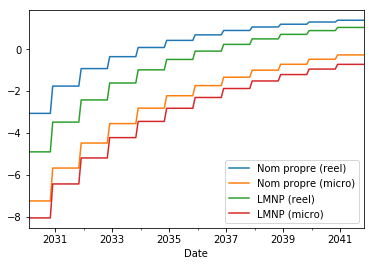

In [14]:
plot_irr(simulations, datetime.datetime(2030, 1, 1))

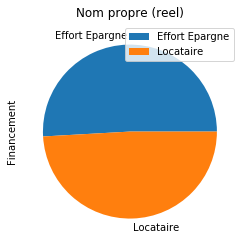

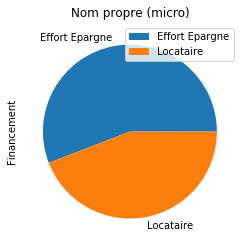

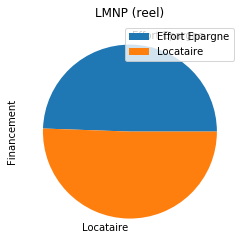

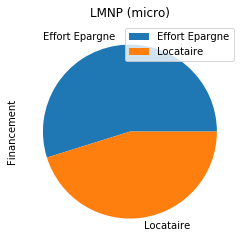

In [15]:
effort_epargne(simulations)

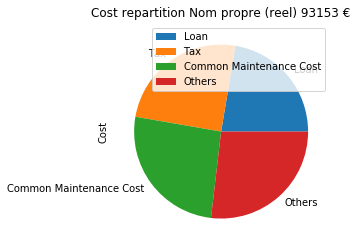

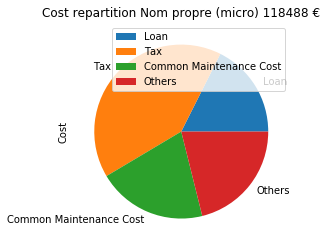

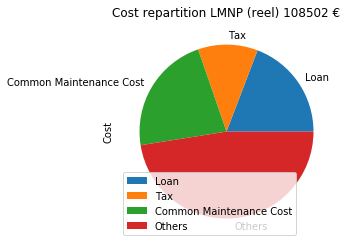

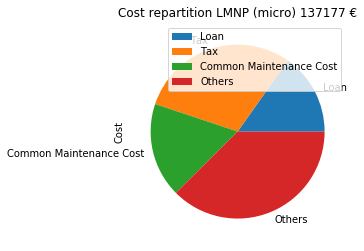

In [16]:
plot_cost(simulations)